# 3 教師あり学習
## 3.1 1次元入力の線形回帰モデル
### 3.1.1 データの準備

In [6]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt

# 小数点以下の表示桁数を3桁にする (A)
np.set_printoptions(precision=3, suppress=True)
plt.rcParams['font.size'] = 14              # フォントサイズを設定 (B)
plt.rcParams['figure.figsize'] = (7, 4)     # 図のサイズ指定 (C)

n = 30                              # データ数
noise = 5                           # ノイズの大きさ
np.random.seed(3)                   # 乱数のseedを指定
xs = np.random.rand(n) * 30         # xs(気温)を一様乱数で決める
ts = (0.1 * xs) ** 4 + 1 * xs + 50 \
    + np.random.randn(n) * noise    # ts(売り上げ)を決める (D)
x_range = (0, 30)                   # 表示用のxの範囲
t_range = (30, 140)                 # 表示用のtの範囲

print('xs', xs)
print('')
print('ts', ts)


xs [16.524 21.244  8.727 15.325 26.788 26.889  3.768  6.217  1.544 13.224
  0.896 13.705 19.474  8.355 20.288 17.726  0.719 16.766  7.778 12.453
  8.506 20.794 13.214  4.706 16.339 23.409  9.191  6.659 11.639 28.092]

ts [ 70.135  90.464  63.033  80.721 122.065 126.031  49.769  44.271  46.926
  61.163  56.516  66.573  75.741  62.075  85.447  68.883  47.736  71.724
  53.774  65.007  47.788  88.152  71.328  59.019  79.008 109.037  67.342
  51.264  67.704 131.06 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


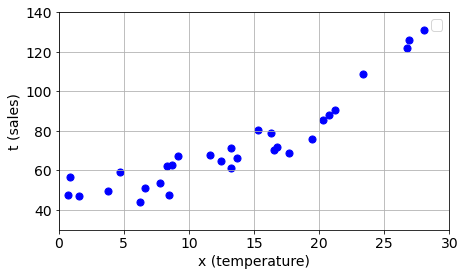

In [3]:
def plt_setting():                          # グラフの調整の関数定義 (B)
    plt.legend()
    plt.xlim(x_range)
    plt.ylim(t_range)
    plt.xlabel('x (temperature)')
    plt.ylabel('t (sales)')
    plt.grid(axis='both')

plt.scatter(xs, ts, marker='o', s=50, color='b')

plt_setting()                               # グラフの調整実行 (C)

plt.show()



### 3.1.2 予測をすることは線を引くこと
* 線形回帰等の回帰分析では、与えられたデータ群にそうような関数（グラフ）をパラメータ調整（学習）で導き、テストデータの入力と解答データが一致するようにすることで、未知の値の予測ができる。

### 3.1.3 線形回帰モデル（直線モデル）
* 前章のまとめから⇒教師あり学習＝関数のグラフを描くこと
と解釈できる。
* ではどう２次元以上の場合どのように線を引くか。
* 以下の直線式を考える
  * $y = w_0 x + w_1$
  * $w:重み(weight)$
  * このモデルは特に「線形回帰モデル」と呼ばれる。
* この$w$をパラメータと呼び、この値を調節（学習）することで入力$x$を受けて出力$y$を予測する.
* ２次元以上の場合は、
  * $y = w_0x_0 + w_1x_1 + ... + w_n-1x_n-1 + w_n$

50.0
[50. 60. 70.]


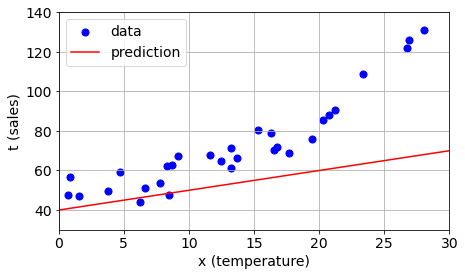

In [8]:
from numpy import ndarray, floating

def liner_reg(x: float|ndarray, w0:float, w1:float) -> float | ndarray:
    return w0 * x + w1

l1 = liner_reg(10.0, 1.0, 40.0)
l2 = liner_reg(np.array([10,20, 30]), 1.0, 40.0)
print(l1)
print(l2)

xs_pred: ndarray = np.linspace(x_range[0], x_range[1], 100)
ys_pred: ndarray = liner_reg(xs_pred, 1.0, 40.0) #type: ignore

plt.scatter(xs, ts, label='data', marker='o', s=50, color='b')
plt.plot(xs_pred, ys_pred, label='prediction', color='r')
plt_setting()
plt.show()


* 上記の場合は、手入力で適当にパラメータを決定したので関数のグラフは実データと大きくそれている。

### 3.1.4 平均二乗誤差（MSE）
* パラメータを調整するにあたって、予測値と実測値のずれ具合（誤差）を計算する必要がある。
* 単純に、「実測値-予測値」では誤差がマイナス（負）になるため、計算上誤差がないということになる。誤差⇒ずれの度合であるので、マイナスだと定義に反する。
* 平均二乗誤差（MSE:mean squared error）は、予測値と実測値のずれ具合を示す１つの指標値。負の値をとらないため全データとのずれを示す指標として使える。$J$で示す。
$$J = \frac{1}{N}\Sigma_{k=0}^{N-1}(t_k - y_k)^2$$
$$t_k:目標値（実測値）,y_k:予測値$$


In [9]:
def mse_liner_reg(x: float|ndarray, t: float|ndarray, w0:float, w1:float) -> float:
    y: float|ndarray = liner_reg(x, w0, w1)
    mse: float = np.mean((t - y) ** 2)
    return mse

mse: float = mse_liner_reg(xs, ts, 1.0, 40.0)
print(mse)

637.0548123550662


### 3.1.5 勾配法
* MSEが最小値になる重み($w_0, w_1等$)の組み合わせの近似値を見つける手法。
* 偏微分をつかって求まる。